In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 4) # -4 ... 10 
print('SD:', SD)

SD: 0.020480000000000005


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'AMZN', 'ANET', 'APPH', 'ATVI', 'AXON', 'AYX', 
    'BILI', 'BYND', 'COUR','CPNG', 'DDOG', 'DOCU', 'DUOL', 'EDIT', 
    'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 'INTG', 'ISRG', 'JD', 
    'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 'MTCH', 'NVCR', 'OKTA', 
    'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', 'ROKU', 'SE', 
    'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR', 
    'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

53

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = datetime.now().date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 8, 13))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['TTD', 'TTWO', 'TWLO', 'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA', '^IXIC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  10 of 10 completed
Generating derived columns...
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...ZEN
   ...ZG
   ...ZNGA
   ...^IXIC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 TTD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 14.239853528824932
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 14.239853528824932
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 14.239853528824932
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_rel_minmax method...
---------------------------------------

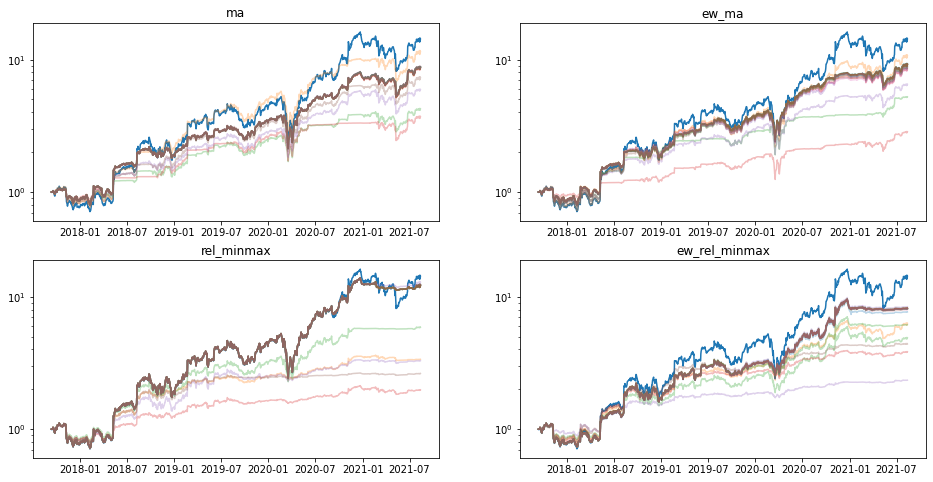

Saving TTD params...



----------------------------------------------------------------------
                                 TTWO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 13.36499155350026
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 13.36499155350026
Refitting current best...
Current best ew_ma returns: 15.168290310225789
Fraction Invested: 0.9985271288200009
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 15.095733569465624
Invested: 0.9985271288200009
New best: 15.095725532091652
Invested: 0.9985271288200009
New best: 15.092560370332333
Invested: 0.9985271288200009
New best: 14.887588850179522
Invested: 0.9985271288200009
New best: 14.8

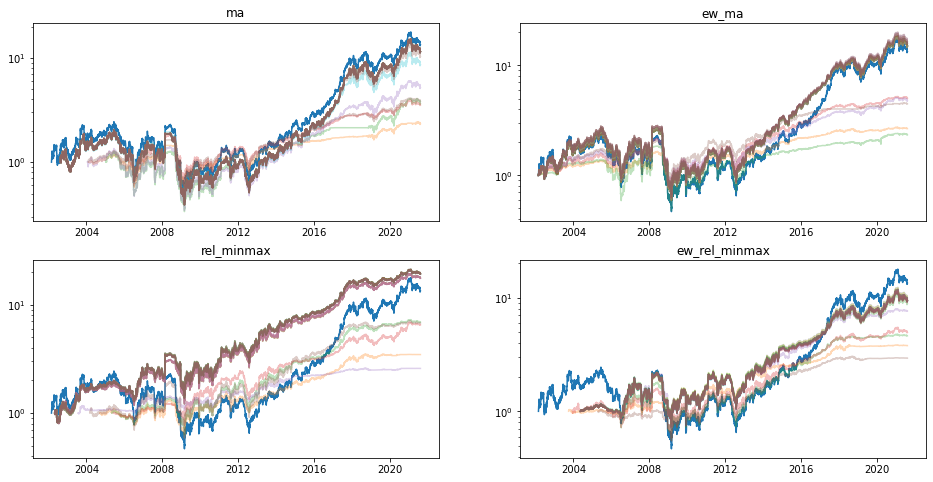

Saving TTWO params...



----------------------------------------------------------------------
                                 TWLO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 12.712806947673927
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 5
Beginning adjusted search...
Round: 20


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 12.712806947673927
Refitting current best...
Current best ew_ma returns: 18.523707425507347
Fraction Invested: 0.9981376038625149
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 18.530291524301685
Invested: 0.9981376038625149
New best: 18.803211551896947
Invested: 0.9981376038625149
New best: 18.918591044454388
Invested: 0.9981376038625149
New best: 18.918628037297196
Invested: 0.9981376038625149
New best: 1

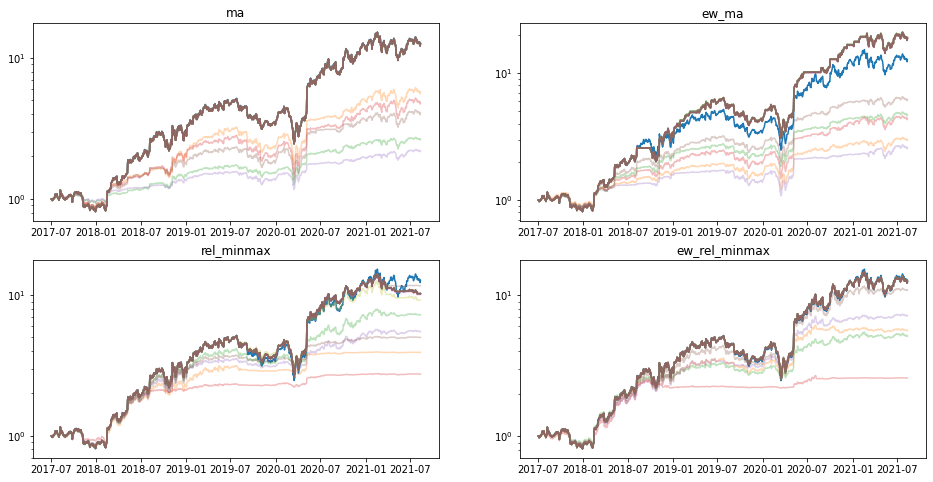

Saving TWLO params...



----------------------------------------------------------------------
                                 TWTR
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.7712026231636502
Refitting current best...
Current best ma returns: 2.0600389758369166
Fraction Invested: 0.5788812232202435
Beginning random search...
New best: 1.7787148902091883
Invested: 0.260629583536757

Beginning adjusted search...
New best: 1.8043217437078933
Invested: 0.260629583536757
New best: 1.8103944514524886
Invested: 0.260629583536757
New best: 1.805976427723442
Invested: 0.260629583536757
New best: 1.8047694905974623
Invested: 0.260629583536757
New best: 1.8041584165677238
Invested: 0.260629583536757
New best: 1.7880657524841905
Invested: 0.260629583536757
New best: 1.7896303950950152
Invested: 0.260629583536757
New best: 1.830256027132462
Invested: 0

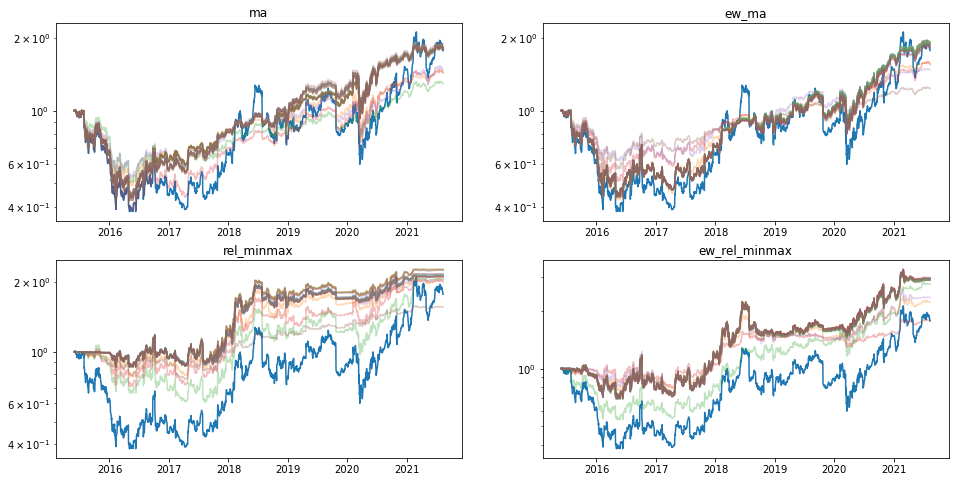

Saving TWTR params...



----------------------------------------------------------------------
                                 UPST
----------------------------------------------------------------------
No saved data. Initialized as None


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.3514190774546204
Refitting current best...
Current best ma returns: 2.3576361935453636
Fraction Invested: 0.9910359161258742
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 2.357564003630243
Invested: 0.9910359161258742
New best: 2.356959889343126
Invested: 0.9910359161258742
New best: 2.356959889343126
Invested: 0.9910359161258742
New best: 2.356601233106203
Invested: 0.9910359161258742
New best: 2.356601233106203
Invested: 0.9910359161258742
New best: 2.3567465965730214
Invested: 0.9910359161258742
New best: 2.3557337006246737
Invested: 0.9910359161258742
New best: 2.355189104737463
Invested: 0.9910359161258742
New best: 2.35

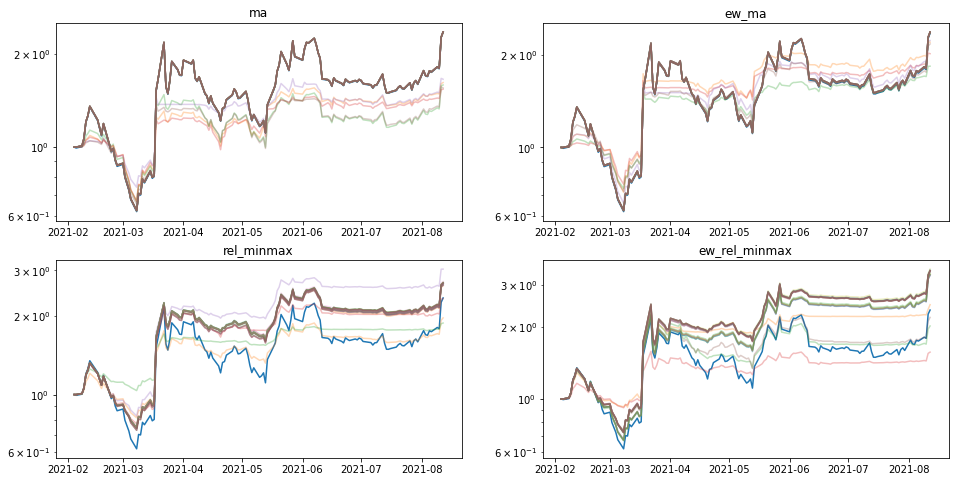

Saving UPST params...



----------------------------------------------------------------------
                                 VEEV
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 11.852810249572046
Refitting current best...
Current best ma returns: 11.951907419218408
Fraction Invested: 0.9999571283952807
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 11.95185630516115
Invested: 0.9999571283952807
New best: 11.946365132210163
Invested: 0.9999571283952807
New best: 11.946028868146218
Invested: 0.9999571283952807
New best: 11.946028868146218
Invested: 0.9999571283952807
New best: 11.94623615885157
Invested: 0.9999571283952807
New best: 11.92983354482022
Invested: 0.9999571283952807
New best: 11.92983354482022
Invested: 0.9999571283952807
New best: 11.919257595816397
Invested: 0.9999571283952807
New best: 11.9185704410292

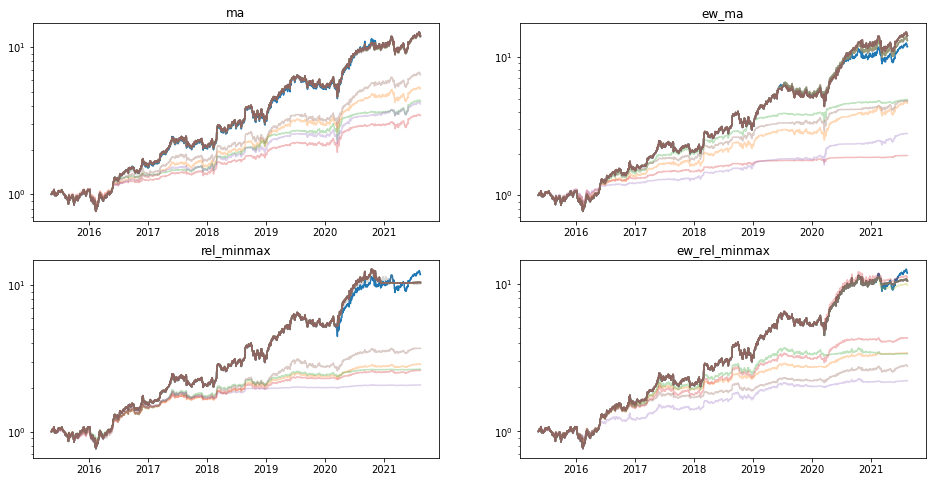

Saving VEEV params...



----------------------------------------------------------------------
                                 ZEN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 6.213246359002628
Refitting current best...
Current best ma returns: 6.891272262736923
Fraction Invested: 0.9995279882427307
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 6.89104925413883
Invested: 0.9995279882427307
New best: 6.899188374272356
Invested: 0.9995279882427307
New best: 6.900085322753238
Invested: 0.9995279882427307
New best: 6.899390037640518
Invested: 0.9995279882427307
New best: 6.899390037640518
Invested: 0.9995279882427307
New best: 6.901056609271534
Invested: 0.9995279882427307
New best: 6.904787815639373
Invested: 0.9995279882427307
New best: 6.902745959844891
Invested: 0.9995279882427307
New best: 6.5593744593900345
Inves

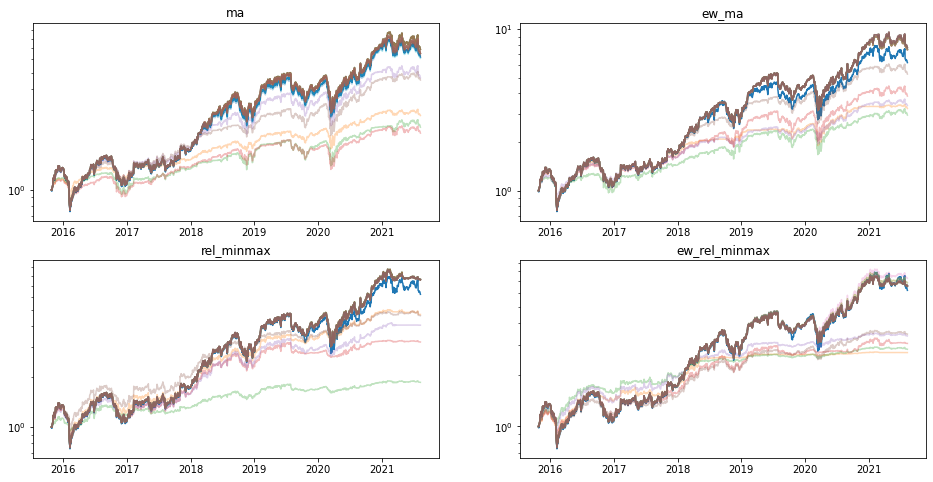

Saving ZEN params...



----------------------------------------------------------------------
                                 ZG
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 4.238628359938302
Refitting current best...
Current best ma returns: 4.651122270679946
Fraction Invested: 0.9974965594513726
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 4.646587183029411
Invested: 0.9982453661604366
New best: 4.646745973121197
Invested: 0.9982453661604366
New best: 4.630419004787919
Invested: 0.9982453661604366
New best: 4.573959771771693
Invested: 0.9982453661604366
New best: 4.553221797322441
Invested: 0.9982453661604366
New best: 4.549786540768584
Invested: 0.9982453661604366
New best: 4.550547475152508
Invested: 0.9982453661604366
New best: 4.550389369418318
Invested: 0.9982453661604366
New best: 4.546959342274627
Investe

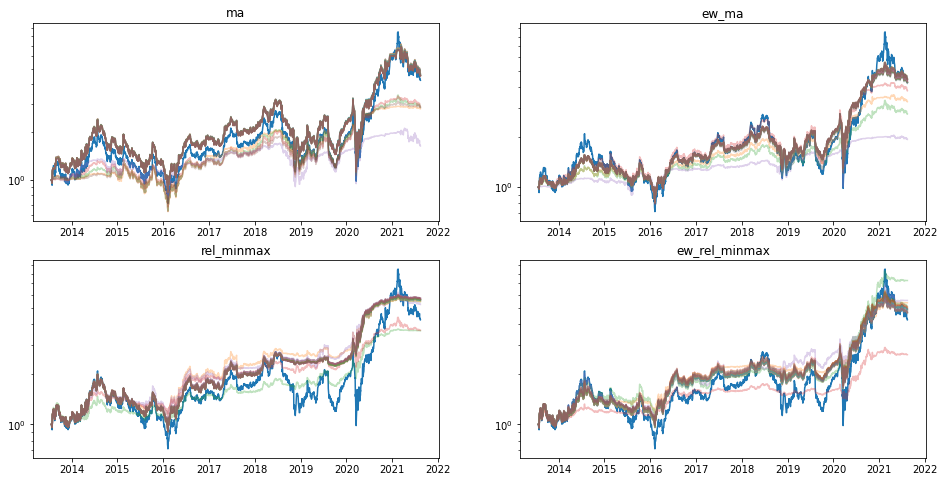

Saving ZG params...



----------------------------------------------------------------------
                                 ZNGA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.8764302114429137
Refitting current best...
Current best ma returns: 2.115752205873558
Fraction Invested: 0.9997976350127153
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 2.119945796406479
Invested: 0.9997976350127153
New best: 2.120003535100059
Invested: 0.9997976350127153
New best: 2.1194454105462284
Invested: 0.9997976350127153
New best: 2.1194454105462284
Invested: 0.9997976350127153
New best: 2.119456982344185
Invested: 0.9997976350127153
New best: 2.122301502491365
Invested: 0.9997976350127153
New best: 2.1355701767914583
Invested: 0.9997976350127153
New best: 2.1414316506311337
Invested: 0.9997976350127153
New best: 2.1414316506311337


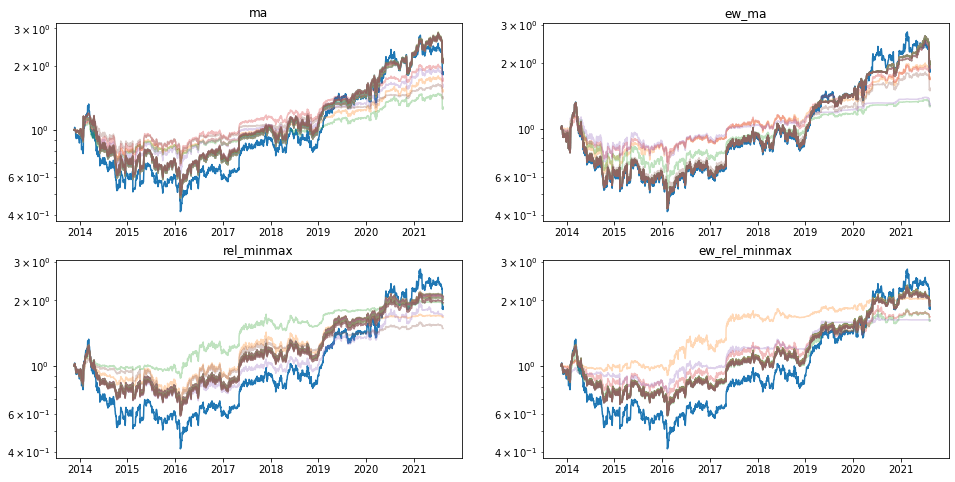

Saving ZNGA params...



----------------------------------------------------------------------
                                 ^IXIC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 35.82267782152013
Refitting current best...
Current best ma returns: 39.036614695982415
Fraction Invested: 0.9719231014175854
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 39.03595030592343
Invested: 0.9719231014175854
New best: 38.70048537539727
Invested: 0.9719231014175854
New best: 38.61464775996848
Invested: 0.9719231014175854
New best: 38.61531754987541
Invested: 0.9719231014175854
New best: 38.59503931894416
Invested: 0.9719231014175854
New best: 38.59503931894416
Invested: 0.9719231014175854
New best: 38.59503931894416
Invested: 0.9719231014175854
New best: 38.595548437568794
Invested: 0.9719231014175854
New best: 36.79371446364048
I

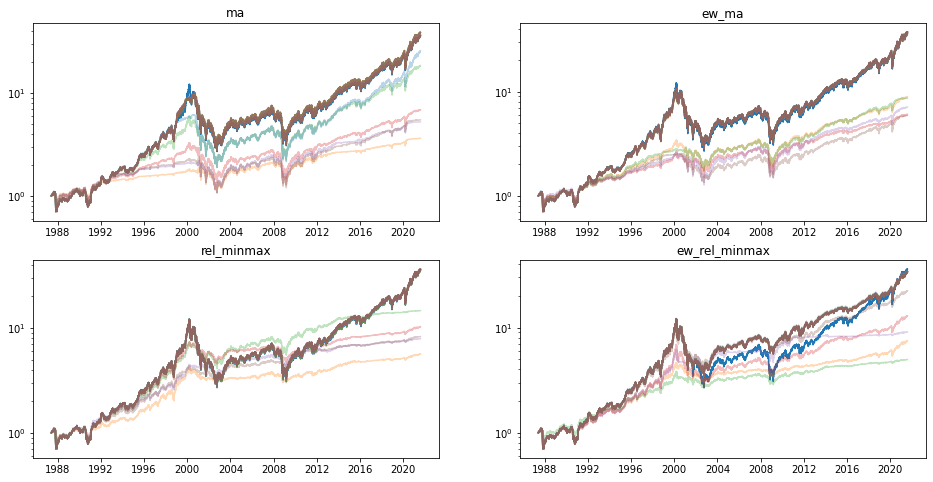

Saving ^IXIC params...


In [14]:
N_RAND = 10
N_ADJ = 15

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    try:
        best_params, best_returns = read_best_params(stock)
        stock_data = get_stock_data(stock, data)
        if stock == 'INTG':
            stock_data.fillna(method='ffill', inplace=True)
            stock_data.fillna(method='bfill', inplace=True)
        qp = QPercent(stock_data, 
                      N_CUTS, 
                      best_param_set=best_params, 
                      best_returns=best_returns, 
                      sd=SD)
        qp.run_sims(N_RAND, N_ADJ)
        best = get_best_param_set(qp)
        save_best_param_set(best, stock)
    except BaseException as e:
        print(f'Error encountered\n{e}')

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


TTD:
  Best Return: 14.239853528824932 (ma)
  100.00% in

TTWO:
  Best Return: 19.220353251193853 (rel_minmax)
  29.89% in

TWLO:
  Best Return: 18.714775987642142 (ew_ma)
  99.81% in

TWTR:
  Best Return: 2.9497603868140976 (ew_rel_minmax)
  1.40% in

UPST:
  Best Return: 3.430629813118059 (ew_rel_minmax)
  99.08% in

VEEV:
  Best Return: 14.249702921499853 (ew_ma)
  99.93% in

ZEN:
  Best Return: 7.696409084335159 (ew_ma)
  99.69% in

ZG:
  Best Return: 5.687338419442162 (rel_minmax)
  12.78% in

ZNGA:
  Best Return: 2.15090901278744 (ma)
  99.98% in

^IXIC:
  Best Return: 37.36791631119593 (ew_ma)
  94.96% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq